# Feature Engineering

We will perform the following operations here:
    - 1.Replace the NaN values
    - 2.Temporal Values
    - 3.Categorical Variables: remove rare labels
    - 4.Standardise the values of the variables of the same range

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.pandas.set_option('display.max_columns', None)

In [64]:
dataset = pd.read_csv('Dataset/train.csv')
print(dataset.shape, '\n')
dataset.head()

(1460, 81) 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1. Replace the NaN values:
    1.1 Replace NaN values of Categorical features
    1.2 Replace NaN values of Numerical features

### 1.1 Replace NaN values of Categorical features

In [65]:
# function to replace NaN values of Categorical features

def replace_cat_features(dataset, features):
    data = dataset.copy()
    data[features] = data[features].fillna('Missing')
    return data

Total numbers of Categorical features having NaN values 16 



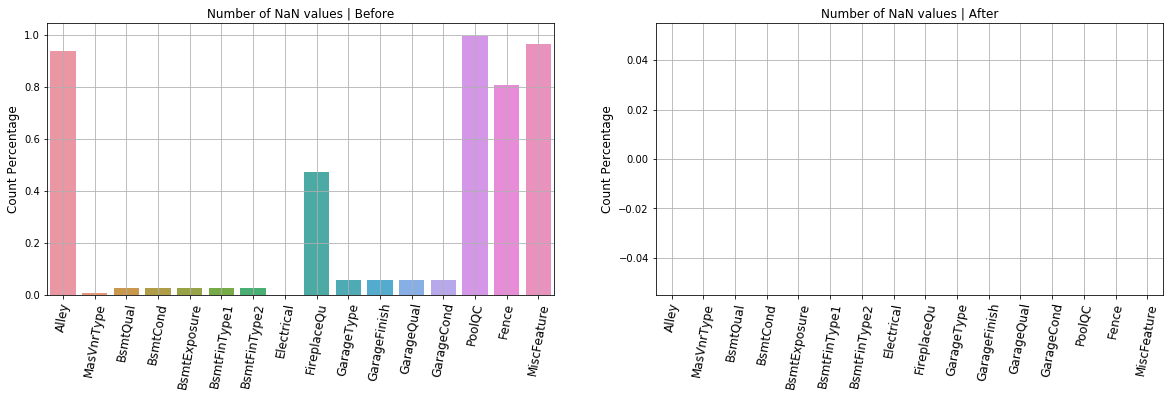

In [66]:
# Categorical features having NaN values

cat_nan_features = [f for f in dataset.columns if dataset[f].dtypes == 'O' and dataset[f].isnull().sum() > 0]
print('Total numbers of Categorical features having NaN values', len(cat_nan_features),'\n')

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(cat_nan_features, dataset[cat_nan_features].isnull().mean())
plt.title('Number of NaN values | Before', fontsize=12)
plt.ylabel('Count Percentage', fontsize=12)
plt.xticks(rotation=80, fontsize=12)
plt.grid(1)

# Replacing the NaN values with a new label 'Missing'
dataset = replace_cat_features(dataset, cat_nan_features)

plt.subplot(1,2,2)
sns.barplot(cat_nan_features, dataset[cat_nan_features].isnull().mean())
plt.title('Number of NaN values | After', fontsize=12)
plt.ylabel('Count Percentage', fontsize=12)
plt.xticks(rotation=80, fontsize=12)
plt.grid(1)


As we can clearly see from the above two diagrams that BEFORE there were many NaN values in every feature.
But AFTER, there are zero NaN values. Thats all we wanted :D

In [67]:
print(dataset[cat_nan_features].isnull().sum(),'\n')
dataset[cat_nan_features].head()  

# NaN values are replaced with 'Missing' and there are zero NaN values in Categorical features

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64 



,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,Missing,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Missing,Attchd,RFn,TA,TA,Missing,Missing,Missing
1,Missing,None,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing
2,Missing,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing
3,Missing,None,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,Missing,Missing,Missing
4,Missing,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing


### 1.2 Replace NaN values of Numerical features

In [68]:
# function to replace NaN values of Numerical features

def replace_nan_features(dataset, features):
    data = dataset.copy()
    
    for f in features:
        # we will replace by median since there are many outliers
        median.value = data[f].median()
        
        # create a new feature to capture the new values
        dataset[f + 'NaN'] = np.where(dataset[f].isnull(),1,0)  
        dataset[f].fillna(median.value, inplace = True)           # FILLING THE NAN VALUES WITH MEDIAN
    
    return data

Total number of Numerical features having NaN values: 3 



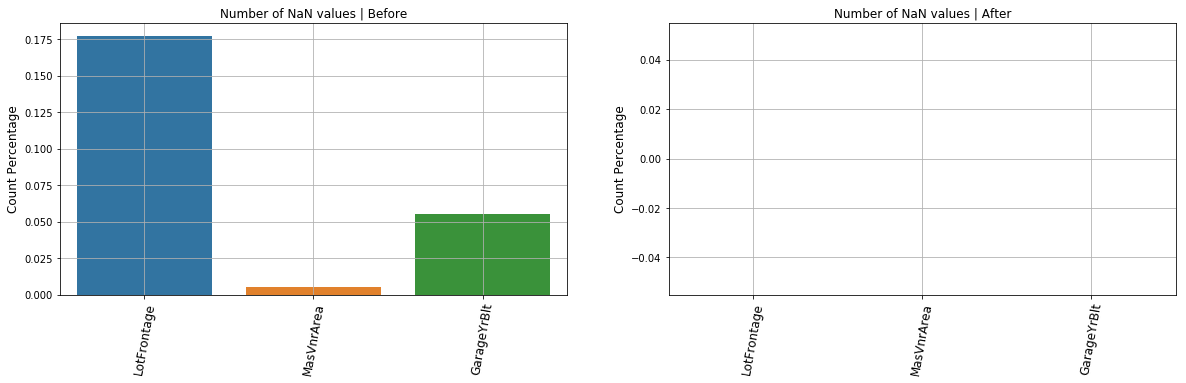

In [69]:
num_nan_features = [f for f in dataset.columns if dataset[f].dtype != 'O' and dataset[f].isnull().sum() > 0]

print('Total number of Numerical features having NaN values:', len(num_nan_features), '\n')

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(num_nan_features, dataset[num_nan_features].isnull().mean())
plt.title('Number of NaN values | Before', fontsize=12)
plt.ylabel('Count Percentage', fontsize=12)
plt.xticks(rotation=80, fontsize=12)
plt.grid(1)

# Replacing the NaN values with a new label 'Missing'
dataset = replace_cat_features(dataset, num_nan_features)

plt.subplot(1,2,2)
sns.barplot(num_nan_features, dataset[num_nan_features].isnull().mean())
plt.title('Number of NaN values | After', fontsize=12)
plt.ylabel('Count Percentage', fontsize=12)
plt.xticks(rotation=80, fontsize=12)
plt.grid(1)


As we can clearly see from the above two diagrams that BEFORE there were many NaN values in every feature.
But AFTER, there are zero NaN values. Thats all we wanted :D

In [70]:
print(dataset[num_nan_features].isnull().sum(),'\n')
dataset[num_nan_features].head()  

# NaN values are replaced with 'Missing' and there are zero NaN values in Categorical features

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64 



,LotFrontage,MasVnrArea,GarageYrBlt
0,65,196,2003
1,80,0,1976
2,68,162,2001
3,60,0,1998
4,84,350,2000


# 2. Redesigning the Temporal Variable (Yr, Data, Time etc)

As we saw in our Data Analysis, we have the following Temporal Features in our dataset:
    -YearBuilt
    -YearRemodAdd
    -GarageYrBlt
    -YrSold
    
We also saw that the SalePrice trend was decreasing with increase in Year sold, i.e, inverse Relationship.

But to solve that issue, we compared the year difference of 'YrSold' with the other temporal features and drew a conclusion.

Keeping that in mind, we'll now be replacing the other temporal features with the Year difference between them and 'YrSold' to make them more meaningful.

In [71]:
temporal_features = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
dataset[temporal_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003,2008
1,1976,1976,1976,2007
2,2001,2002,2001,2008
3,1915,1970,1998,2006
4,2000,2000,2000,2008


# 3. Handling the Skewed Numerical Features

Total number of Discrete Numerical features having Skewed distribution : 4 

['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice'] 



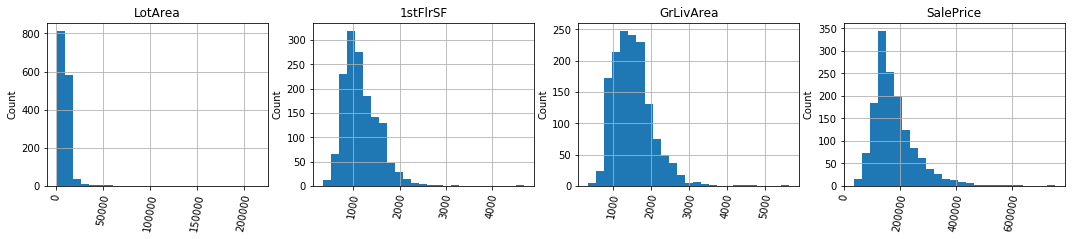

In [72]:
# Creating a temp data because our original data not contains 0s and 1s for the NaN features, which will hinder our following code
temp_data = dataset.copy()

# Creating a list of features which are NUMERICAL, DOES NOT CONTAIN 0 VALUE, NOT A TEMPORAL OR 'Id' FEATURE, CONTINUOUS

num_skewed_features = [f for f in temp_data.columns if temp_data[f].dtype != 'O' and 0 not in temp_data[f].unique() and f not in temporal_features+['Id'] and len(temp_data[f].unique()) >25]

print('Total number of Discrete Numerical features having Skewed distribution :', len(num_skewed_features), '\n')
print(num_skewed_features, '\n')

plt.figure(figsize=(23,3))
for idx, f in enumerate(num_skewed_feature):
    plt.subplot(1,5, idx+1)
    dataset[f].hist(bins=25)
    plt.xticks(rotation=80)
    plt.ylabel('Count')
    plt.title(f)

We see that these features are very much skewed, so we'll normalize them.

# 3.1. Applying Log Normalization
Note: To apply Log Normalization, we need to confirm that the feature does not contain any 0 value, else it'll throw an error because, log(0) = -inf

Therefore, we already carefully selected the features which does not have a 0 value in it.

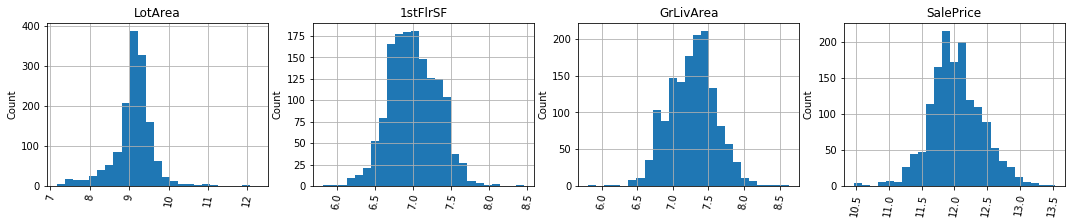

In [73]:
for f in num_skewed_features:
    dataset[f] = np.log(dataset[f])
    
plt.figure(figsize=(23,3))
for idx, f in enumerate(num_skewed_feature):
    plt.subplot(1,5, idx+1)
    dataset[f].hist(bins=25)
    plt.xticks(rotation=80)
    plt.ylabel('Count')
    plt.title(f)

# 4. Handling Rare Categorical Features
Relabeling the classes which have a count of less than MIN_PERCENTAGE (1%), in there respective feature.

In [88]:
categorical_features = [f for f in dataset.columns if dataset[f].dtype == 'O']

print('Length of categorical features:', len(cat_features))

Length of categorical features: 46


In [83]:
MIN_PERCENTAGE=1

for f in categorical_features:
    temp = dataset.groupby(f)['SalePrice'].count()/len(dataset)
    temp= temp[temp > MIN_PERCENTAGE].index
    dataset[f] = np.where(dataset[f].isin(temp),dataset[f],'misc')
    
dataset.head()    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,misc,misc,9.041922,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,7,5,2003,2003,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,706,misc,0,150,856,misc,misc,misc,misc,6.752270,854,0,7.444249,1,0,2,1,3,1,misc,8,misc,0,misc,misc,misc,misc,2,548,misc,misc,misc,0,61,0,0,0,0,misc,misc,misc,0,2,2008,misc,misc,12.247694
1,2,20,misc,misc,9.169518,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,6,8,1976,1976,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,978,misc,0,284,1262,misc,misc,misc,misc,7.140453,0,0,7.140453,0,1,2,0,3,1,misc,6,misc,1,misc,misc,misc,misc,2,460,misc,misc,misc,298,0,0,0,0,0,misc,misc,misc,0,5,2007,misc,misc,12.109011
2,3,60,misc,misc,9.328123,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,7,5,2001,2002,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,486,misc,0,434,920,misc,misc,misc,misc,6.824374,866,0,7.487734,1,0,2,1,3,1,misc,6,misc,1,misc,misc,misc,misc,2,608,misc,misc,misc,0,42,0,0,0,0,misc,misc,misc,0,9,2008,misc,misc,12.317167
3,4,70,misc,misc,9.164296,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,7,5,1915,1970,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,216,misc,0,540,756,misc,misc,misc,misc,6.867974,756,0,7.448334,1,0,1,0,3,1,misc,7,misc,1,misc,misc,misc,misc,3,642,misc,misc,misc,0,35,272,0,0,0,misc,misc,misc,0,2,2006,misc,misc,11.849398
4,5,60,misc,misc,9.565214,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,8,5,2000,2000,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,misc,655,misc,0,490,1145,misc,misc,misc,misc,7.043160,1053,0,7.695303,1,0,2,1,4,1,misc,9,misc,1,misc,misc,misc,misc,3,836,misc,misc,misc,192,84,0,0,0,0,misc,misc,misc,0,12,2008,misc,misc,12.429216


# 5. Converting the String Labels to Numerical Labels

In [84]:
for f in cat_features:
    total_classes = dataset.groupby(f)['SalePrice'].mean().sort_values().index
    new_classes = {cat_class:num_class for num_class, cat_class in enumerate(total_classes)}
    dataset[f] = dataset[f].map(new_classes)

In [85]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,0,9.041922,0,0,0,0,0,0,0,0,0,0,0,0,7,5,2003,2003,0,0,0,0,0,0,0,0,0,0,0,0,0,706,0,0,150,856,0,0,0,0,6.752270,854,0,7.444249,1,0,2,1,3,1,0,8,0,0,0,0,0,0,2,548,0,0,0,0,61,0,0,0,0,0,0,0,0,2,2008,0,0,12.247694
1,2,20,0,0,9.169518,0,0,0,0,0,0,0,0,0,0,0,0,6,8,1976,1976,0,0,0,0,0,0,0,0,0,0,0,0,0,978,0,0,284,1262,0,0,0,0,7.140453,0,0,7.140453,0,1,2,0,3,1,0,6,0,1,0,0,0,0,2,460,0,0,0,298,0,0,0,0,0,0,0,0,0,5,2007,0,0,12.109011
2,3,60,0,0,9.328123,0,0,0,0,0,0,0,0,0,0,0,0,7,5,2001,2002,0,0,0,0,0,0,0,0,0,0,0,0,0,486,0,0,434,920,0,0,0,0,6.824374,866,0,7.487734,1,0,2,1,3,1,0,6,0,1,0,0,0,0,2,608,0,0,0,0,42,0,0,0,0,0,0,0,0,9,2008,0,0,12.317167
3,4,70,0,0,9.164296,0,0,0,0,0,0,0,0,0,0,0,0,7,5,1915,1970,0,0,0,0,0,0,0,0,0,0,0,0,0,216,0,0,540,756,0,0,0,0,6.867974,756,0,7.448334,1,0,1,0,3,1,0,7,0,1,0,0,0,0,3,642,0,0,0,0,35,272,0,0,0,0,0,0,0,2,2006,0,0,11.849398
4,5,60,0,0,9.565214,0,0,0,0,0,0,0,0,0,0,0,0,8,5,2000,2000,0,0,0,0,0,0,0,0,0,0,0,0,0,655,0,0,490,1145,0,0,0,0,7.043160,1053,0,7.695303,1,0,2,1,4,1,0,9,0,1,0,0,0,0,3,836,0,0,0,192,84,0,0,0,0,0,0,0,0,12,2008,0,0,12.429216


# 6. Feature Scaling

In [90]:
from sklearn.preprocessing import MinMaxScaler

features_to_be_scaled = [f for f in dataset.columns if f not in ['Id', 'SalePrice']]

scaler = MinMaxScaler()
scaler.fit(dataset[features_to_be_scaled])

C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [92]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,0,9.041922,0,0,0,0,0,0,0,0,0,0,0,0,7,5,2003,2003,0,0,0,0,0,0,0,0,0,0,0,0,0,706,0,0,150,856,0,0,0,0,6.752270,854,0,7.444249,1,0,2,1,3,1,0,8,0,0,0,0,0,0,2,548,0,0,0,0,61,0,0,0,0,0,0,0,0,2,2008,0,0,12.247694
1,2,20,0,0,9.169518,0,0,0,0,0,0,0,0,0,0,0,0,6,8,1976,1976,0,0,0,0,0,0,0,0,0,0,0,0,0,978,0,0,284,1262,0,0,0,0,7.140453,0,0,7.140453,0,1,2,0,3,1,0,6,0,1,0,0,0,0,2,460,0,0,0,298,0,0,0,0,0,0,0,0,0,5,2007,0,0,12.109011
2,3,60,0,0,9.328123,0,0,0,0,0,0,0,0,0,0,0,0,7,5,2001,2002,0,0,0,0,0,0,0,0,0,0,0,0,0,486,0,0,434,920,0,0,0,0,6.824374,866,0,7.487734,1,0,2,1,3,1,0,6,0,1,0,0,0,0,2,608,0,0,0,0,42,0,0,0,0,0,0,0,0,9,2008,0,0,12.317167
3,4,70,0,0,9.164296,0,0,0,0,0,0,0,0,0,0,0,0,7,5,1915,1970,0,0,0,0,0,0,0,0,0,0,0,0,0,216,0,0,540,756,0,0,0,0,6.867974,756,0,7.448334,1,0,1,0,3,1,0,7,0,1,0,0,0,0,3,642,0,0,0,0,35,272,0,0,0,0,0,0,0,2,2006,0,0,11.849398
4,5,60,0,0,9.565214,0,0,0,0,0,0,0,0,0,0,0,0,8,5,2000,2000,0,0,0,0,0,0,0,0,0,0,0,0,0,655,0,0,490,1145,0,0,0,0,7.043160,1053,0,7.695303,1,0,2,1,4,1,0,9,0,1,0,0,0,0,3,836,0,0,0,192,84,0,0,0,0,0,0,0,0,12,2008,0,0,12.429216


In [94]:
scaler.transform(dataset[features_to_be_scaled])

array([[0.23529412, 0.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.25      , 0.        ,
        0.        ],
       [0.23529412, 0.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.5       , 0.        ,
        0.        ]])

In [95]:
dataset = pd.concat([dataset[['Id', 'SalePrice']].reset_index(drop=True),
                     pd.DataFrame(scaler.transform(dataset[features_to_be_scaled]), columns=features_to_be_scaled)],
                     axis=1)

dataset.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,12.247694,0.235294,0.0,0.0,0.366344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.500,0.949275,0.883333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125089,0.0,0.0,0.064212,0.140098,0.0,0.0,0.0,0.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.0,0.500000,0.0,0.000000,0.0,0.0,0.0,0.0,0.50,0.386460,0.0,0.0,0.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,0.0,0.0
1,2,12.109011,0.000000,0.0,0.0,0.391317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.555556,0.875,0.753623,0.433333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.173281,0.0,0.0,0.121575,0.206547,0.0,0.0,0.0,0.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.0,0.333333,0.0,0.333333,0.0,0.0,0.0,0.0,0.50,0.324401,0.0,0.0,0.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.25,0.0,0.0
2,3,12.317167,0.235294,0.0,0.0,0.422359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.500,0.934783,0.866667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.086109,0.0,0.0,0.185788,0.150573,0.0,0.0,0.0,0.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.0,0.333333,0.0,0.333333,0.0,0.0,0.0,0.0,0.50,0.428773,0.0,0.0,0.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,0.0,0.0
3,4,11.849398,0.294118,0.0,0.0,0.390295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.500,0.311594,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038271,0.0,0.0,0.231164,0.123732,0.0,0.0,0.0,0.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.0,0.416667,0.0,0.333333,0.0,0.0,0.0,0.0,0.75,0.452750,0.0,0.0,0.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.00,0.0,0.0
4,5,12.429216,0.235294,0.0,0.0,0.468761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.777778,0.500,0.927536,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116052,0.0,0.0,0.209760,0.187398,0.0,0.0,0.0,0.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.0,0.583333,0.0,0.333333,0.0,0.0,0.0,0.0,0.75,0.589563,0.0,0.0,0.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.50,0.0,0.0


# Exporting the Dataset

In [98]:
dataset.to_csv('Dataset/X_train.csv',index=False)